In [1]:
from os import walk
from os.path import join

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem import PorterStemmer #for text stemming
from nltk.stem import SnowballStemmer #for text stemming
from nltk.corpus import stopwords #to remove stopwords
from nltk.tokenize import word_tokenize #for tokenization
from wordcloud import WordCloud #for wordcloud visulization
from PIL import Image #for image manipulation and procesing

from bs4 import BeautifulSoup #to remove html tags
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split # for data spliting

sns.set()

In [2]:
dataset = pd.read_csv ('C:/github/covid-analysis/covid_analysis.csv', encoding='unicode_escape')

In [3]:
EXAMPLE_FILE = 'C:/github/covid-analysis/practice_tweet.txt'

In [4]:
THUMBS_UP_FILE = 'C:/github/covid-analysis/wordcloud_resources/thumbs-up.png'
THUMBS_DOWN_FILE = 'C:/github/covid-analysis/wordcloud_resources/thumbs-down.png'
CUSTOM_FONT_FILE = 'C:/github/covid-analysis/wordcloud_resources/OpenSansCondensed-Bold.ttf'

In [5]:
dataset.head()

,Index,Label,Tweets
0,1,1,BREAKING: Recent report suggests Hawiian royal...
1,2,1,I have never seen a country easing covid-19 lo...
2,3,1,With ample experience working with emerging an...
3,4,1,Man with COVID19 developed peripheral limb isc...
4,5,1,"Nigeria records 7 deaths, 196 fresh COVID-19 c..."


In [6]:
stream = open(EXAMPLE_FILE, encoding='latin-1')
message = stream.read()
stream.close()

print(message)

Emmanuel Macron is just kicking ass tonight.

Some of his words for the French TV:

"If Ukraine falls, our security will be at risk. If Russia continues to escalate, if the situation worsens, we must be ready, and we will be ready. To be prepared, we will make the necessary decisions to ensure that Russia never wins."

"I want our compatriots to understand that there is only one person responsible for the situation we are in: it is the Kremlin regime. I am undoubtedly a responsible leader who has spoken with Vladimir Putin more than anyone else. We are not in fiction, this is not a novel or a TV series."

"Therefore, if the war spreads, if the war spreads in Europe, it will be the only choice and responsibility of Russia. Of course, today Russia is an opponent. The Kremlin regime is an opponent. I have always said this, we are not waging war with Russia and the Russian people. 

"And we support Ukraine. I will tell you very simply: there will be no lasting peace without sovereignty, a 

In [7]:
dataset.shape

(112, 3)

In [8]:
dataset.Label.value_counts()

1    77
0    35
Name: Label, dtype: int64

In [9]:
amount_of_covid = dataset.Label.value_counts()[1]
amount_of_postCovid = dataset.Label.value_counts()[0]

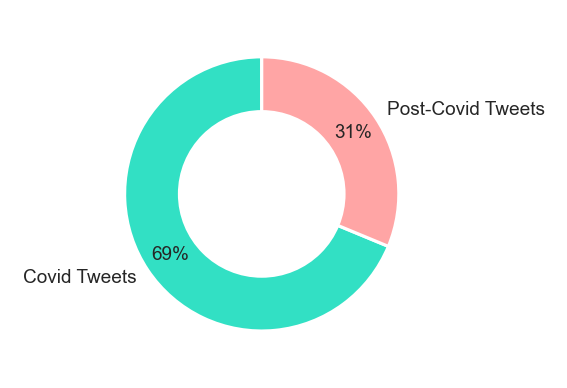

In [15]:
#visualize with donut chat
category_names = ['Covid Tweets', 'Post-Covid Tweets']
sizes = [amount_of_covid, amount_of_postCovid]
custom_colours = ['#32e0c4', '#ffa5a5']

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90,
        autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8)

# draw circle to create a donut chart
centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)

plt.show()

# Natural Language Processing NLP
### Download the NLTK Resources (Tokenizer & Stopwords)

In [16]:
angka = [1,2,3,4,5]
result = []

for num in angka:

  num = num + 100
  result.append(num)

print(result)

[101, 102, 103, 104, 105]


In [17]:
# cara list comprehension
result_list = [num+100 for num in angka]
print(result)

[101, 102, 103, 104, 105]


In [18]:
nltk.download('punkt') # Punkt Sentence Tokenizer

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [19]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

## Removing Stop Words

In [20]:
stop_words = set(stopwords.words('english')) # convert the stopwords to set

In [21]:
type(stop_words)

set

In [22]:
if 'this' in stop_words: print('Found it!')

Found it!


In [23]:
soup = BeautifulSoup(dataset.at[10, 'Tweets'], 'html.parser') # the text and the parser we like to use. built in
print(soup.prettify())

Lose your job because of #COVID19? PETAs hiring!



In [24]:
soup.get_text() # to remove all html

'Lose your job because of #COVID19? PETA\x92s hiring!'

### Functions for Email Processing

In [25]:
def clean_message(message, stemmer=PorterStemmer(), 
                 stop_words=set(stopwords.words('english'))):
    
    # Converts to Lower Case and splits up the words
    words = word_tokenize(message.lower())
    
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

In [26]:
# Modify function to remove HTML tags. Then test on Email with DOC_ID 2. 
def clean_msg_no_html(message, stemmer=PorterStemmer(), 
                 stop_words=set(stopwords.words('english'))):
    
    # Remove HTML tags
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
    
    # Converts to Lower Case and splits up the words
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
           # filtered_words.append(stemmer.stem(word))
            filtered_words.append(word) 
    
    return filtered_words

In [27]:
clean_message(message)

['emmanuel',
 'macron',
 'kick',
 'ass',
 'tonight',
 'word',
 'french',
 'tv',
 'ukrain',
 'fall',
 'secur',
 'risk',
 'russia',
 'continu',
 'escal',
 'situat',
 'worsen',
 'must',
 'readi',
 'readi',
 'prepar',
 'make',
 'necessari',
 'decis',
 'ensur',
 'russia',
 'never',
 'win',
 'want',
 'compatriot',
 'understand',
 'one',
 'person',
 'respons',
 'situat',
 'kremlin',
 'regim',
 'undoubtedli',
 'respons',
 'leader',
 'spoken',
 'vladimir',
 'putin',
 'anyon',
 'els',
 'fiction',
 'novel',
 'tv',
 'seri',
 'therefor',
 'war',
 'spread',
 'war',
 'spread',
 'europ',
 'choic',
 'respons',
 'russia',
 'cours',
 'today',
 'russia',
 'oppon',
 'kremlin',
 'regim',
 'oppon',
 'alway',
 'said',
 'wage',
 'war',
 'russia',
 'russian',
 'peopl',
 'support',
 'ukrain',
 'tell',
 'simpli',
 'last',
 'peac',
 'without',
 'sovereignti',
 'return',
 'intern',
 'recogn',
 'border',
 'ukrain',
 'includ',
 'crimea',
 'today',
 'peac',
 'ukrain',
 'must',
 'weak',
 'must',
 'soberli',
 'look',
 '

In [28]:
clean_msg_no_html(dataset.at[5, 'Tweets'])

['scientists',
 'volunteering',
 'time',
 'nerve',
 'cells',
 'solve',
 'never',
 'prouder',
 'nerd']

## Apply Cleaning and Tokenisation to all messages
#### Slicing Dataframes and Series & Creating Subsets

In [29]:
dataset.iat[2, 2] # Access a single value for a row/column pair by integer position. in this case its the FILE_NAME

'With ample experience working with emerging and infectious diseases, FHS alumnus Greg Thomas-Reilly has been working on the frontlines of the #COVID19 crisis leading the COVID-19 Response Coordination Group for vulnerable populations.'

In [30]:
dataset.iloc[5:11] # to select a subset of the data

,Index,Label,Tweets
5,6,1,Scientists are volunteering their time & nerve...
6,7,1,This was confirmed by the commissioner of heal...
7,8,1,Jigawa state has recorded its first covid 19 d...
8,9,1,Tom Hanks donates his plasma to UCLA after bea...
9,10,1,"Kesha will be live for an online concert, set ..."
10,11,1,Lose your job because of #COVID19? PETAs hiring!


In [31]:
first_emails = dataset.Tweets.iloc[0:3]

nested_list = first_emails.apply(clean_message)

In [32]:
flat_list = [item for sublist in nested_list for item in sublist]
        
len(flat_list)

50

In [33]:
flat_list

['break',
 'recent',
 'report',
 'suggest',
 'hawiian',
 'royal',
 'famili',
 'respons',
 'engin',
 'outbreak',
 'never',
 'seen',
 'countri',
 'eas',
 'lockdown',
 'confirm',
 'case',
 'rise',
 'embarrassingli',
 'case',
 'wednesday',
 'night',
 'soon',
 'discov',
 'better',
 'aliv',
 'anyth',
 'els',
 'wa',
 'alright',
 'la',
 'la',
 'ampl',
 'experi',
 'work',
 'emerg',
 'infecti',
 'diseas',
 'fh',
 'alumnu',
 'greg',
 'work',
 'frontlin',
 'crisi',
 'lead',
 'respons',
 'coordin',
 'group',
 'vulner',
 'popul']

In [35]:
%%time

# use apply() on all the messages in the dataframe
nested_list = dataset.Tweets.apply(clean_msg_no_html)

Wall time: 65.8 ms


In [36]:
nested_list.head()

0    [breaking, recent, report, suggests, hawiian, ...
1    [never, seen, country, easing, lockdown, confi...
2    [ample, experience, working, emerging, infecti...
3    [man, developed, peripheral, limb, ischemic, n...
4             [nigeria, records, deaths, fresh, cases]
Name: Tweets, dtype: object

In [37]:
nested_list.tail()

107    [police, accusing, julius, abure, attempted, m...
108    [ukrainian, forces, shot, fighter, russian, fo...
109            [threshold, patience, year, years, years]
110    [crazy, check, points, lagos, edo, state, joke...
111    [naira, hits, dollar, despite, efcc, gun, resc...
Name: Tweets, dtype: object

### Using Logic to Slice Dataframes

In [38]:
dataset[dataset.Label == 1].shape

(77, 3)

In [39]:
dataset[dataset.Label == 1].tail()

,Index,Label,Tweets
72,73,1,"There are only 3 ways to go about this, we pra..."
73,74,1,"In new India, everything is as in wonderland. ..."
74,75,1,Lockdown: Sadly we are just starting unless #C...
75,76,1,"we get Covid19 vaccine, Is it right to keep st..."
76,77,1,So we need to learn to live with Covid19. Lock...


In [40]:
# two variables (doc_ids_spam, doc_ids_ham) which hold onto the indices for the spam and the non-spam emails respectively. 
index_covid = dataset[dataset.Label == 1].index
index_postcovid = dataset[dataset.Label == 0].index

In [41]:
index_covid

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76],
           dtype='int64')

### Subsetting a Series with an Index

In [42]:
type(index_postcovid)

pandas.core.indexes.numeric.Int64Index

In [43]:
type(nested_list)

pandas.core.series.Series

In [44]:
nested_list_postcovid = nested_list.loc[index_postcovid]

In [45]:
nested_list_postcovid.shape

(35,)

In [46]:
nested_list_postcovid.tail()

107    [police, accusing, julius, abure, attempted, m...
108    [ukrainian, forces, shot, fighter, russian, fo...
109            [threshold, patience, year, years, years]
110    [crazy, check, points, lagos, edo, state, joke...
111    [naira, hits, dollar, despite, efcc, gun, resc...
Name: Tweets, dtype: object

In [47]:
nested_list_covid = nested_list.loc[index_covid]

In [48]:
# python list comprehension to find the total number of words in our cleaned dataset of non-spam email bodies.
# the total number of words in normal emails in the dataset. the 10 most common words used in non-spam 
flat_list_postcovid = [item for sublist in nested_list_postcovid for item in sublist]
normal_words = pd.Series(flat_list_postcovid).value_counts()

normal_words.shape[0] # total number of unique words in the non-spam messages

296

In [49]:
normal_words[:10]

today        3
job          3
multiple     3
forces       3
years        3
tech         3
questions    2
russian      2
ukrainian    2
spiritual    2
dtype: int64

In [50]:
# python list comprehension to find the total number of words in our cleaned dataset of spam email bodies.
# the total number of words in normal emails in the dataset. the 10 most common words used in spam
flat_list_covid = [item for sublist in nested_list_covid for item in sublist]
covid_words = pd.Series(flat_list_covid).value_counts()

covid_words.shape[0] # total number of unique words in the spam messages

709

In [51]:
covid_words[:10]

vaccine       48
quarantine    24
people        19
us             9
lockdown       8
think          7
corona         6
get            6
time           6
still          5
dtype: int64

### Creating a Word Cloud

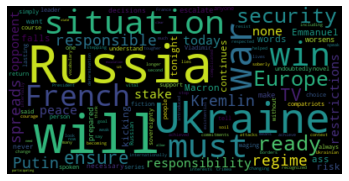

In [52]:
word_cloud = WordCloud().generate(message)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Cloud of PostCovid Messages

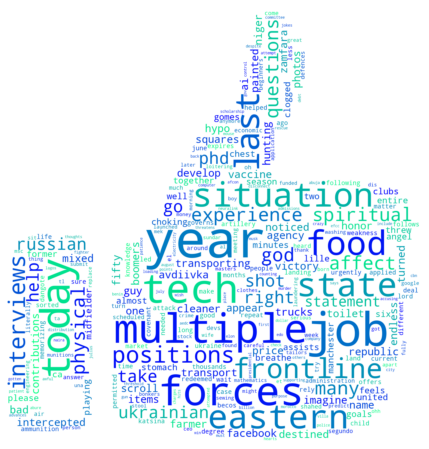

In [53]:
icon = Image.open(THUMBS_UP_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) # converts the image object to an array

# Generate the text as a string for the word cloud
ham_str = ' '.join(flat_list_postcovid)

word_cloud = WordCloud(mask=rgb_array, background_color='white', max_words=500, colormap='winter')

word_cloud.generate(ham_str)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Cloud of Covid Messages

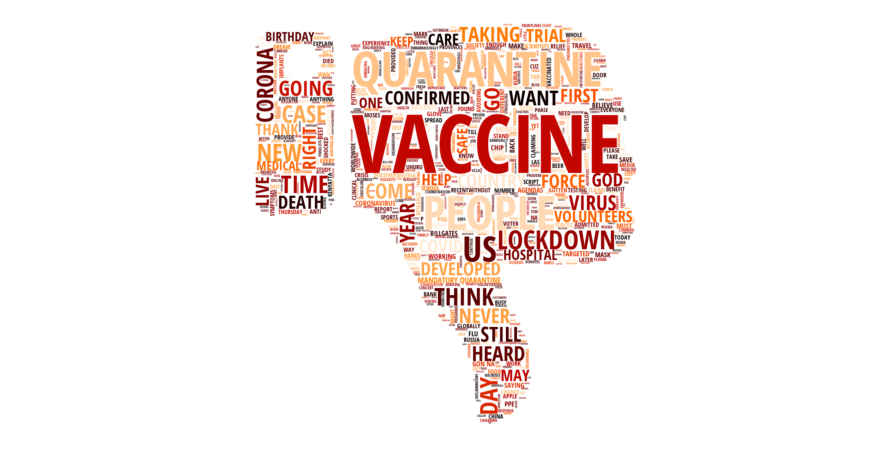

In [54]:
icon = Image.open(THUMBS_DOWN_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) # converts the image object to an array

# Generate the text as a string for the word cloud
spam_str = ' '.join(flat_list_covid)

word_cloud = WordCloud(mask=rgb_array, background_color='white', max_font_size=300,
                       max_words=2000, colormap='gist_heat', font_path=CUSTOM_FONT_FILE)

word_cloud.generate(spam_str.upper())

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()